# Introduction to `lamatrix`: Combining models

`lamatrix` enables you to combine `Model` objects to build more powerful models for your data. This tutorial will show how models can be combined.

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

First, we will make some fake data to fit. Here I'm creating data which is a combination of a simple polynomial, a sinusoid, and some noise terms.

In [2]:
x = np.arange(-5, 5, 0.01)
y = x * 2.3459 + 1.435 + np.random.normal(0, 0.3, size=len(x))
ye = np.ones(len(x)) * 0.3

y += 10*np.sin(x) + 10*np.cos(x)

If we plot the data we can see this is a simple trend

<ErrorbarContainer object of 3 artists>

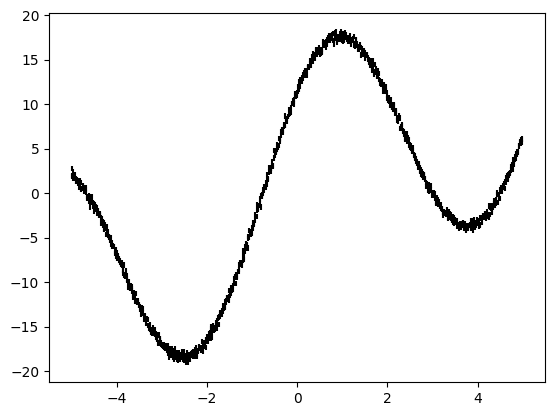

In [3]:
plt.errorbar(x, y, ye, ls='', c='k')

Now we will use `lamatrix` to fit this data. 

In [4]:
from lamatrix import Polynomial, Sinusoid, Constant

In this case, we know our model is a linear combination of these trends, so we simply add them together. Note we know both the polynomial and sinusoid are functions of the same variable, which we name `"x"`.

In [5]:
model = Polynomial('x', order=1) + Sinusoid('x') + Constant()

We've combined different models, but we are still able to use it in the same way as a simple model. For example, here's the equation for the model

In [6]:
model.equation

'\\[f(\\mathbf{x}) = w_{0} \\mathbf{x}^{1} + w_{1} \\sin(\\mathbf{x}) + w_{2} \\cos(\\mathbf{x}) + w_{3} \\]'

Now we have the model, we can simply use the `fit` class method.

In [7]:
model.fit(x=x, data=y, errors=ye)

The model fit with no errors, let's look at the posterior distributions.

In [8]:
model.posteriors

DistributionContainer
	[(2.342, 0.0034), (10.014, 0.013), (10.005, 0.014), (1.4216, 0.0099)]

We can see we've fit the posteriors with small errors. Let's compare to our inputs. Our input polynomial was

$2.3459x + 1.435$

Because `model` is a linear combination of objects, we can split this model back into it's components:

In [9]:
model

JointModel
	Polynomial(x)[n, 1]
	Sinusoid(x)[n, 2]
	Constant()[n, 1]

In [10]:
model[0]

Polynomial(x)[n, 1]

In [11]:
model[0].posteriors

DistributionContainer
	[(2.342, 0.0034)]

We can see that the first order polynomial has posteriors after our fit. This is only a first order polynomial, and so it has only one weight. The weight is very close 
to our input weight of 2.3459!

The polynomial we used was
$10.sin(x) + 10.cos(x)$. Let's look at the posteriors.

In [12]:
model[1]

Sinusoid(x)[n, 2]

In [13]:
model[1].equation

'\\[f(\\mathbf{x}) = w_{0} \\sin(\\mathbf{x}) + w_{1} \\cos(\\mathbf{x})\\]'

In [14]:
model[1].posteriors

DistributionContainer
	[(10.014, 0.013), (10.005, 0.014)]

This has two weights, one for sine and one for cosine. The weights are very close to the input amplitudes!

Finally we have the constant term

In [15]:
model[2]

Constant()[n, 1]

In [16]:
model[2].posteriors

DistributionContainer
	[(1.4216, 0.0099)]

This is very close to our input offset term. Let's plot the model to see how this looks

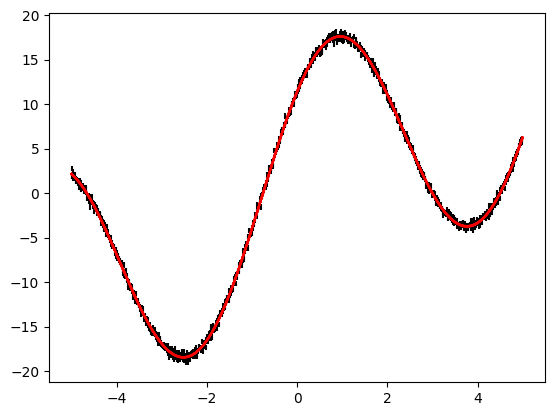

In [17]:
plt.errorbar(x, y, ye, ls='', c='k')
plt.plot(x, np.asarray([model.sample(x=x) for count in range(100)]).T, c='r', alpha=0.1);

This is a great fit to the data!